# <span style="color:darkred"> Laboratorio di Simulazione Numerica </span>
## <span style="color:darkorange">  Esercitazione 5</span>

## 05.1

Ho campionato tramite l'algoritmo di Metropolis le distribuzioni di probabilità $|\Psi_{1,0,0}(x,y,z)|^2$, corrispondente allo stato $1s$ dell'atomo di idrogeno, e $|\Psi_{2,1,0}(x,y,z)|^2$, ovvero lo stato $2p$, con:
$$\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0}\ , 
$$
 
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)\ .
$$

L'algoritmo di Metropolis è molto efficiente per campionare qualunque distribuzione $p(x)$. Esso compie un *Random Walk* in cui però non vi è uguale probabilità di accettare un passo piuttosto che un altro e l'insieme di punti $x_n$ campionati avrà una distribuzione che tende a quella desiderata.
Ad ogni passo viene estratto un punto $x'$ da una distribuzione $T(x'|x)$ (detta di transizione) e si accetta la mossa proposta con probabilità $A(x'|x)=min\bigl(1, \frac{T(x|x') p(x')}{T(x'|x) p(x)}\bigr) = \alpha$. Si estrae un nuovo numero casuale $p \in [0, 1]$ e se $p\leq\alpha$ allora si accetta la mossa e si aggiunge il punto all'insieme campionato, altrimenti si estrae un nuovo numero.

In questo esercizio ho valutato $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ e $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ in coordinate cartesiane, covertendo $(r, \theta, \phi)$ in $(x, y, z)$. Dapprima ho estratto i punti da una distribuzione di probabilità uniforme ed essendo simmetrica ho calcolato direttamente $A(x', y', z'|x, y, z)=min\bigl(1, \frac{p(x', y', z')}{p(x, y, z)}\bigr) = \alpha$. In un secondo momento ho estratto ciascuna nuova coordinata da una distribuzione gaussiana e ho paragonato i risultati.
Ho implementato all'interno del generatore dei numeri casuali un metodo che generasse numeri distribuiti come una gaussiana di media $\mu$ e deviazione standard $\sigma$ nel seguente modo: $x = \mu + \sigma  \sqrt{-2\ln(1-s)}\ cos(2\pi t)$, con $s$ e $t$ numeri uniformemente distribuiti nell'intervallo unitario.

La distribuzione di probabilità di $|\Psi_{1,0,0}(x,y,z)|^2$, essendo relativa allo stato fondamentale, ha un picco al raggio di Bohr $a_0$ che è il raggio dell'orbita più interna. È una funzione molto piccata e nonnulla in un piccolo range di distanze. Scalando il raggio per $a_0$, ho scelto come punto iniziale il picco della distribuzione $(x_0, y_0, z_0) = (1, 1, 1)$. La distribuzione dello stato $2p$ invece ha un picco attorno a $4a_0$ e si distribuisce su un range radiale più ampio. Ho scelto come punto iniziale per generare i numeri $(x_0, y_0, z_0) = (4, 4, 4)$. Per prima cosa ho regolato l'accettazione attorno al $50\%$ compiendo passi più piccoli per lo stato $1s$ piuttosto che $2p$ e successivamente ho iniziato il vero e proprio campionamento misurando per ogni passo il raggio $r = \sqrt{x^2+y^2+z^2}$.

Ho effettuato $M=10^6$ passi e ho calcolato la media su $N=100$ blocchi. Riporto i grafici con la media in funzione del numero di blocchi, dove si osserva che i risultati campionati sono compatibili con il risultato analitico entro l'errore. Riporto anche un grafico 3-dimensionale con le coordinate $(x, y, z)$ campionate.

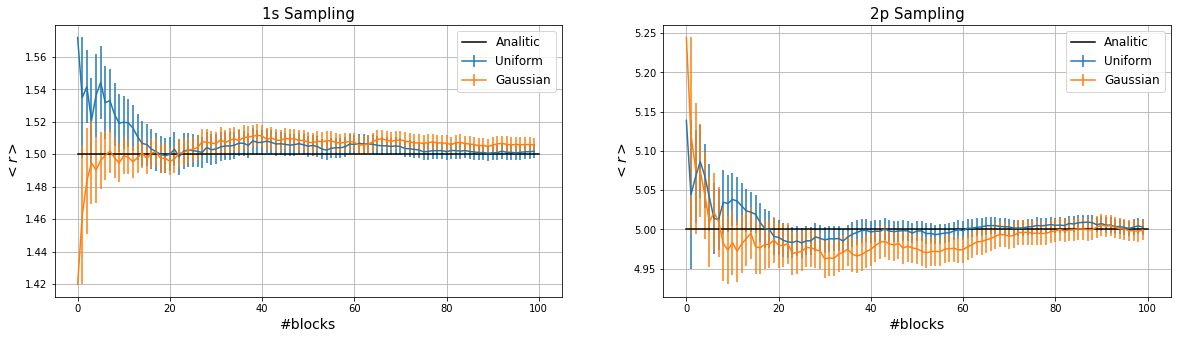

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

M=100000
N=100
x=np.arange(N)

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

(R, errR)=np.loadtxt('results.txt', unpack=True, usecols=(0, 1))
(RGauss, errRGauss)=np.loadtxt('resultsGauss.txt', unpack=True, usecols=(0, 1))
axs[0].errorbar(x,R,yerr=errR, label = 'Uniform')
axs[0].errorbar(x,RGauss,yerr=errRGauss, label = 'Gaussian')
axs[0].plot([0, N], [1.5, 1.5], color='black', label='Analitic')
axs[0].set_title('1s Sampling', fontsize=15)

(R2, errR2)=np.loadtxt('results2.txt', unpack=True, usecols=(0, 1))
(R2Gauss, errR2Gauss)=np.loadtxt('resultsGauss2.txt', unpack=True, usecols=(0, 1))
axs[1].errorbar(x,R2,yerr=errR2, label = 'Uniform')
axs[1].errorbar(x,R2Gauss,yerr=errR2Gauss, label = 'Gaussian')
axs[1].plot([0, N], [5, 5], color='black', label='Analitic')
axs[1].set_title('2p Sampling', fontsize=15)

for ax in axs.flat:
    ax.set_xlabel('#blocks', fontsize=14)
    ax.set_ylabel('$<r>$', fontsize=14)
    ax.legend(fontsize='large')
    ax.grid()

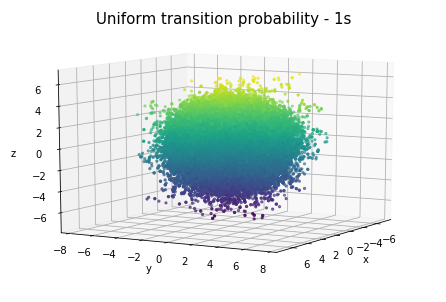

In [2]:
(X, Y, Z)=np.loadtxt('coordinates1.txt', unpack=True, usecols=(0, 1, 2))
(X1, Y1, Z1)=np.loadtxt('coordinatesGauss.txt', unpack=True, usecols=(0, 1, 2))

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_title('Uniform transition probability - 1s', fontsize=15)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()

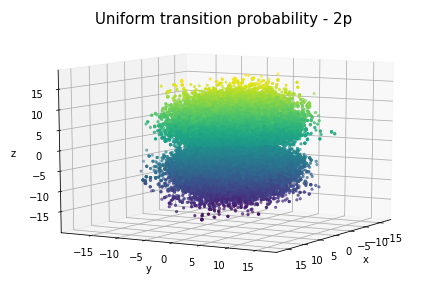

In [3]:
(X, Y, Z)=np.loadtxt('coordinates2.txt', unpack=True, usecols=(0, 1, 2))
(X1, Y1, Z1)=np.loadtxt('coordinatesGauss2.txt', unpack=True, usecols=(0, 1, 2))

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_title('Uniform transition probability - 2p', fontsize=15)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()